In [1]:
#Problem statment
#Clustering of the customers in to the different groups so one group of customers may represent those that tend to purchase more
#in that mall and some other group may represent that dont purchase that much in a mall.so having these groups of customers that
#tells that mallto make better bussiness decisions to make better marketing stratergy.

In [2]:
#It is based on the unsupervised machine learning

In [3]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
#Data analysis

In [5]:
#loading the data from csv file to a pandas DataFrame
customer_data=pd.read_csv("C:\\Users\\kotha\\OneDrive\\Desktop\\Mall_Customers.csv")

In [8]:
#printing first five rows of the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#printing last five rows of the dataframe
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:
#Finding the number of rows nad columns
customer_data.shape

(200, 5)

In [13]:
#Getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
#Checking the missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
#In the given dataset the customer id is useless because we are doing depending upon the score 
#The group of customers will be classified based on the annual income and spending score.

In [16]:
#Choosing the annual income column and spending score column

In [18]:
X=customer_data.iloc[:,[3,4]].values #The columns 3 and 4 represent annual income and spending score

In [20]:
print(X) #In the array first value represnts annual income and second value represents spending score

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [21]:
#Choosing the number of the clusters
 
#WCCS-> WITHIN CLUSTERS SUM OF SQUARES

In [22]:
#Finding wccs values for different number of clusters

In [30]:
wccs=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    
    wccs.append(kmeans.inertia_)
    

C:\Users\kotha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


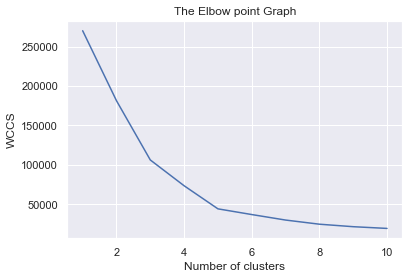

In [31]:
#Plot and elbow graph 
sns.set()
plt.plot(range(1,11),wccs)
plt.title("The Elbow point Graph")
plt.xlabel('Number of clusters')
plt.ylabel('WCCS')
plt.show()

In [32]:
#It is also called cutoff point graph

In [33]:
#optimum number of clusters is 5

In [36]:
#Training the k means clustering model
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

#Return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)

In [37]:
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [38]:
#Data visualization
#Visualizing all the clusters


In [40]:
#Plotting all the clusters and their centroids
#5 clusters=0,1,2,3,4

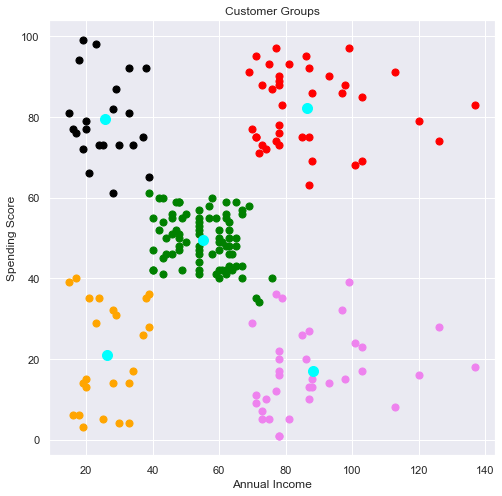

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='violet',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='green',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='red',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='black',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='orange',label='Cluster 5')

#Plot the centroids 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [4]:
#This is how the malls improve their markieting and give the great discount on the group of customers

In [3]:
#In the above example there are some group of customers where the customers are buying and leaving